# HANDWRITING RECOGNITION PROJECT

## IMPORT REQUIRED LIBRARIES

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

## LOAD AND PREPARE THE DATASET

In [22]:
# MNIST DATASET
( train_x , train_y ) , ( test_x , test_y ) = mnist.load_data() 

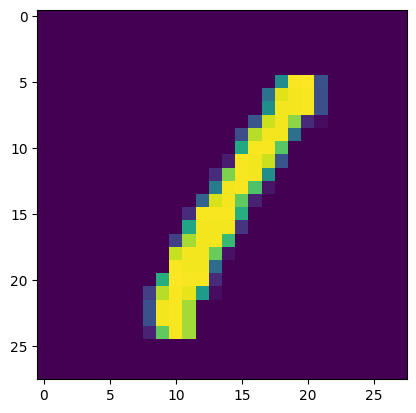

In [23]:
plt.imshow(train_x[3])

In [24]:
# NORMALIZE PIXEL VALUES TO BE BETWEEN 0 AND 1
train_x = train_x.astype('float')/255
test_x = test_x.astype('float')/255

In [25]:
# RESHAPE IMAGES TO FLAT VECTORS(28 * 28 PIXELS --> 784 ELEMENTS)
train_x = train_x.reshape((60000, 28 * 28))
test_x = test_x.reshape((10000, 28 * 28))

In [26]:
# CONVERT LABELS TO ONE-HOT ENCODING
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [27]:
# SPLIT TRAINING DATA INTO TRAINING AND VALIDATION SETS
val_x = train_x[:10000]
val_y = train_y[:10000]
partial_train_x = train_x[10000:]
partial_train_y = train_y[10000:]

## BUILD THE NEURAL NETWORK MODEL

In [28]:
# CREATE A EQUENTIAL MODEL (LINEAR STACK OF LAYERS)
model = keras.Sequential([

    # INPUT LAYER WITH 784 NEURON ( ONE FOR EACH PIXEL)
    # FIRST HIDDEN LAYER WITH 512 NEURONS AND RELU ACTIVATION

    layers.Dense( 512 , activation= 'relu' , input_shape = (28*28,)),

    # DROPUOT LAYER TO PREVENT OVERFITTING ( RANDOMLY DROPS 20% OF NEURONS)

    layers.Dropout(0.2),

    # SECOND HIDDEN LAYER WITH 256 NEURONS AND RELU ACTIVATION    

    layers.Dense( 256 , activation = 'relu'),

    # ANOTHER DROP LAYER

    layers.Dropout(0.2),

    # OUTPUT LAYER WITH 10 NEURONS ( ONE FOR EACH DIGIT) AND SOFTMAX ACTIVATION

    layers.Dense( 10 , activation = 'softmax')
])

In [29]:
# COMPILE THE MODEL
model.compile(optimizer= 'adam',
              loss =  'categorical_crossentropy',
              metrics = ['accuracy'])

## TRAIN THE MODEL WITH EARLY STOPPING

In [30]:
# DEFINE EARLY STOPPING CALLBACK
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [31]:
# TRAIN THE MODEL
history = model.fit(
    partial_train_x,
    partial_train_y,
    epochs = 50,
    batch_size = 128,
    validation_data = (val_x, val_y),
    callbacks = [early_stopping]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8455 - loss: 0.5070 - val_accuracy: 0.9627 - val_loss: 0.1268
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9622 - loss: 0.1261 - val_accuracy: 0.9722 - val_loss: 0.0912
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9745 - loss: 0.0827 - val_accuracy: 0.9732 - val_loss: 0.0860
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9804 - loss: 0.0601 - val_accuracy: 0.9765 - val_loss: 0.0786
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9844 - loss: 0.0487 - val_accuracy: 0.9794 - val_loss: 0.0746
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9860 - loss: 0.0404 - val_accuracy: 0.9788 - val_loss: 0.0752
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9899 - loss: 0.0308 - val_accuracy: 0.9793 - val_loss: 0.0752
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9898 - loss: 0.0309 - val_accu

## EVALUATE THE MODEL

In [32]:
# EVALUATE ON TEST SET
test_loss , test_acc = model.evaluate(test_x, test_y)
print(f'Test accuracy:{test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9786 - loss: 0.0844
Test accuracy:0.9823


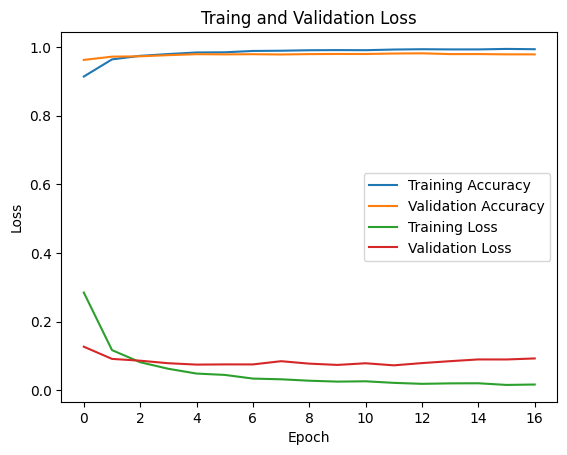

In [33]:
#PLOT TRAINING HISTORY

# plot accuracy 

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Traing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plot loss

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Traing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

## MAKING PREDICTION

In [34]:
# SELECT THE RANDOM TEST IMAGE
sample_idx = np.random.randint(10, len(test_x))
sample_img = test_x[sample_idx].reshape(1, -1)
True_label = np.argmax(test_y[sample_idx])

In [35]:
# MAKE PREDICTION
prediction = model.predict(sample_img)
predicted_label = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


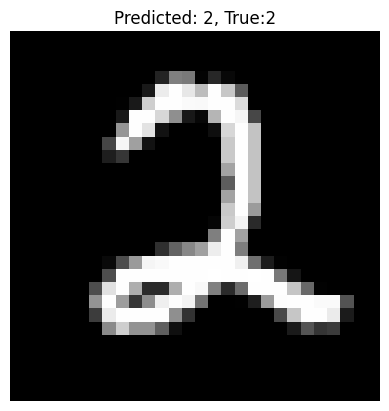

In [37]:
# DISPLAY THE IMAGE
plt.imshow(test_x[sample_idx].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_label}, True:{True_label}')
plt.axis('off')
plt.show()